## Observations and Insights 

##### Overall Study Design
Similar number of mice per treatment. Same number of male and female overall.

##### S

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = mouse_metadata.merge(study_results, on = 'Mouse ID', how = 'outer')
# Display the data table for preview
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_results["Mouse ID"].unique())
print(mouse_count)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mt_agg = mouse_results.groupby(["Mouse ID","Timepoint"])
mt_count = mt_agg.count()
mt_count.loc[mt_count["Sex"]>1]

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_results.loc[mouse_results["Mouse ID"] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = mouse_results.loc[mouse_results["Mouse ID"] != 'g989']
clean_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
corrected_mouse_count = len(clean_results["Mouse ID"].unique())
print(corrected_mouse_count)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_agg = clean_results.groupby("Drug Regimen")

regimen_avg = pd.DataFrame(regimen_agg.mean()["Tumor Volume (mm3)"]).rename(columns = {"Tumor Volume (mm3)":"mean"})
regimen_med = pd.DataFrame(regimen_agg.median()["Tumor Volume (mm3)"]).rename(columns = {"Tumor Volume (mm3)":"median"})
regimen_var = pd.DataFrame(regimen_agg.var()["Tumor Volume (mm3)"]).rename(columns = {"Tumor Volume (mm3)":"variance"})
regimen_std = pd.DataFrame(regimen_agg.std()["Tumor Volume (mm3)"]).rename(columns = {"Tumor Volume (mm3)":"stdev"})
regimen_sem = pd.DataFrame(regimen_agg.sem()["Tumor Volume (mm3)"]).rename(columns = {"Tumor Volume (mm3)":"sem"})

regimen_stats = regimen_avg.merge(regimen_med, on = 'Drug Regimen').merge(regimen_var, on = "Drug Regimen").merge(regimen_std, on = 'Drug Regimen').merge(regimen_sem, on = 'Drug Regimen')
regimen_stats

,mean,median,variance,stdev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

regimen_descr = pd.DataFrame(regimen_agg[["Drug Regimen","Tumor Volume (mm3)"]].describe())['Tumor Volume (mm3)']
regimen_descr.rename(columns = {'50%':"median"})
regimen_descr["sem"] = regimen_descr["std"]/(regimen_descr['count']**(1/2))
regimen_descr['variance'] = regimen_descr['std']**2
regimen_descr['median'] = regimen_descr['50%']

regimen_descr[['mean','median','variance','std','sem']].rename(columns = {"std":"stdev"})

,mean,median,variance,stdev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

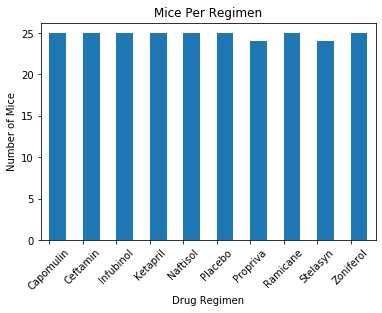

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_treatment = pd.DataFrame(regimen_agg.nunique()["Mouse ID"]).rename(columns={"Mouse ID":"Mouse Count"})

mice_per_treatment.plot(kind = 'bar',rot = 45, legend = False,align = 'edge')
plt.title("Mice Per Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")

plt.show()

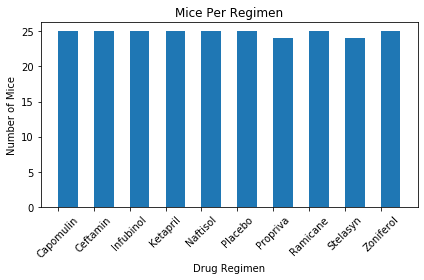

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
try:
    mice_per_treatment = mice_per_treatment.reset_index()
except:
    mice_per_treatment = mice_per_treatment
    
x = np.arange(len(mice_per_treatment["Drug Regimen"]))

plt.bar(x,mice_per_treatment["Mouse Count"],.55,align = 'edge')
plt.title("Mice Per Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")

tick_locations = [value for value in x]
plt.xticks(tick_locations,mice_per_treatment["Drug Regimen"],rotation = 45)

plt.tight_layout()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_agg = clean_results.groupby("Sex")
gender_count = pd.DataFrame(gender_agg.nunique()["Mouse ID"])

try:
    gender_count = gender_count.reset_index()
except:
    gender_count = gender_count

value  = [val for val in gender_count["Mouse ID"]]
genders = [g for g in gender_count["Sex"]]


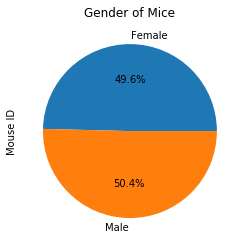

In [12]:
gender_count.plot(kind = 'pie', y = 'Mouse ID', labels = genders, title = 'Gender of Mice', legend = False,  autopct='%1.1f%%')


Text(0.5, 1.0, 'Gender of Mice')

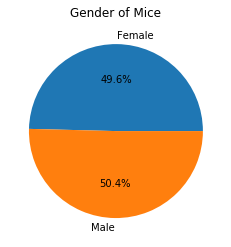

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(value,labels = genders, autopct='%1.1f%%')
plt.title("Gender of Mice")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment = mouse_results.loc[(mouse_results["Drug Regimen"] == 'Capomulin') | (mouse_results["Drug Regimen"] == 'Ramicane') | (mouse_results["Drug Regimen"] ==  'Infubinol') | (mouse_results["Drug Regimen"] ==  'Ceftamin')]

mouse_agg = treatment.groupby("Mouse ID")

# Start by getting the last (greatest) timepoint for each mouse
t_max = pd.DataFrame(mouse_agg['Timepoint'].max())
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
f_mouse = t_max.merge(treatment,on = ["Mouse ID", "Timepoint"])


f_mouse


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
f_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
f_desc = f_mouse['Tumor Volume (mm3)'].describe()
f_quant = f_mouse['Tumor Volume (mm3)'].quantile([.25,.5,.75])
IQR = f_quant[.75] - f_quant[.25]
upper = f_quant[.5]+1.5*IQR
lower = f_quant[.5]-1.5*IQR
outliers = f_mouse.loc[(f_mouse['Tumor Volume (mm3)'] >= upper)|f_mouse['Tumor Volume (mm3)']<= lower]


# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin = [val for val in f_mouse.loc[f_mouse['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']]
ramicane = [val for val in f_mouse.loc[f_mouse['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']]
infubinol = [val for val in f_mouse.loc[f_mouse['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']]
ceftamin = [val for val in f_mouse.loc[f_mouse['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']]

f_results = pd.DataFrame({'capomulin':capomulin,
                          'ramicane':ramicane,
                          'infubinol':infubinol,
                          'ceftamin':ceftamin,
                         })
# Determine outliers using upper and lower bounds
outliers

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


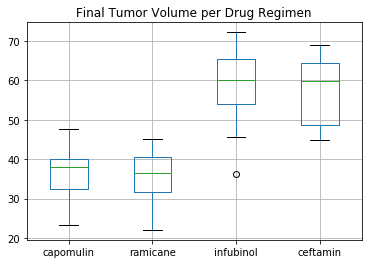

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
figbox, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Drug Regimen')
f_results.boxplot(column = ['capomulin','ramicane','infubinol','ceftamin'])

## Line and Scatter Plots

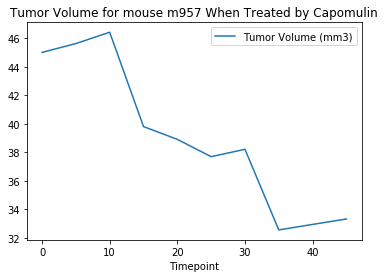

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
from random import choice
unlucky_mouse = choice([value for value in clean_results.loc[clean_results['Drug Regimen'] == 'Capomulin']["Mouse ID"]])

sample = clean_results.loc[(clean_results['Mouse ID'] == unlucky_mouse) & (clean_results['Drug Regimen'] == 'Capomulin')]

title = f'Tumor Volume for mouse {unlucky_mouse} When Treated by Capomulin'
sample.plot('Timepoint','Tumor Volume (mm3)',title = title)


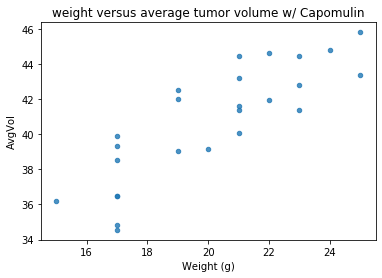

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_sample = clean_results.loc[clean_results["Drug Regimen"] == 'Capomulin'][["Mouse ID","Tumor Volume (mm3)","Weight (g)"]]
mouse_agg = weight_sample.groupby('Mouse ID')
weight_mean = pd.DataFrame(mouse_agg.mean())
tumor_vol = pd.DataFrame(weight_mean["Tumor Volume (mm3)"]).rename(columns = {"Tumor Volume (mm3)":'AvgVol'})
plot_data = weight_sample[['Mouse ID','Weight (g)']].merge(tumor_vol, on = 'Mouse ID').drop_duplicates()
plot_data.plot(kind = 'scatter',y = "AvgVol", x = "Weight (g)",title = 'weight versus average tumor volume w/ Capomulin',alpha = .8)


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope,intercept,rval,pval,stderr) = st.linregress(plot_data["Weight (g)"],plot_data["AvgVol"])
correlation_coeff = rval**2
equation = f'y = {slope}x + {intercept}'
print(f''' 
Linear Regression:
{equation}

R-Squared:
{correlation_coeff}
''')

 
Linear Regression:
y = 0.9544396890241046x + 21.552160532685015

R-Squared:
0.7088568047708721



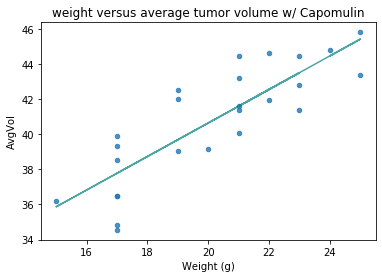

In [21]:
x = plot_data["Weight (g)"]
y = x*slope + intercept

# ax2.set_title('Tumor Volume vs Average Weight')
plot_data.plot(kind = 'scatter',x = "Weight (g)", y = "AvgVol",title = 'weight versus average tumor volume w/ Capomulin',alpha = .8)
plt.plot(x,y,color = 'teal', alpha = .7)
